In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])


In [3]:
model= np.polyfit(x, y, 1)

In [4]:
model

array([ 0.64383562, 26.78082192])

In [5]:
predict = np.poly1d(model)
predict(65)

68.63013698630137

In [6]:
y_pred= predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [7]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.4803218090889326

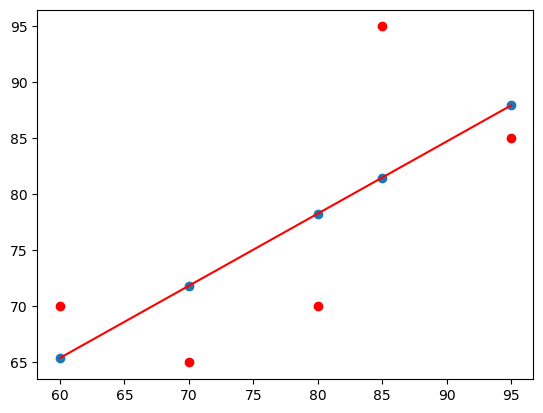

In [8]:
y_line = model[1] + model[0]* x
plt.plot(x, y_line, c = 'r')
plt.scatter(x, y_pred)
plt.scatter(x,y,c='r')


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()

In [41]:
data = pd.DataFrame(boston.data)

In [42]:
data.columns = boston.feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [43]:
data['PRICE'] = boston.target

In [44]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [45]:
x = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size =0.2,random_state = 0)

In [47]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model=lm.fit(xtrain, ytrain)

In [48]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [49]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print(mse)
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)

0.5289841670367192
0.5234413607125448


In [51]:
mse = mean_squared_error(ytest, ytest_pred)
print(mse)

0.5289841670367192


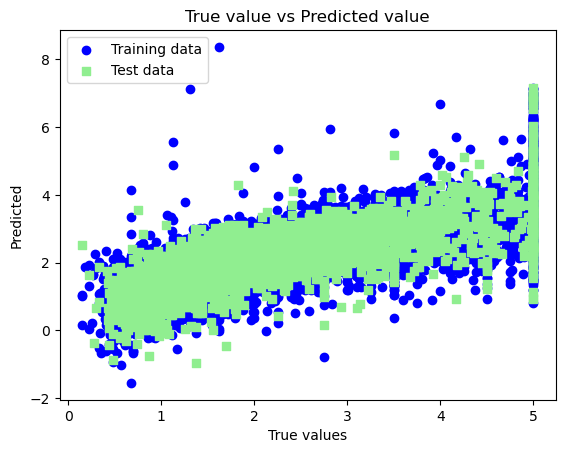

In [53]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
#plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()